## Final Project Group -6

<b> We have choose Harrypotter as our Data Set where we perform various analysis 
    like semantic (where we try to find the emotions) network(finding similarity) and clustering using kmedoids

In [53]:
#Importing libraries
import pandas as pd
import numpy as np
from collections import Counter
import re

import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [54]:
#Reading .txt data into a variable
def read_book(title_path):
    with open(title_path, "r", encoding ="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

In [55]:
#Calling function to read the data
book1 = read_book('./archive/Book1.txt')
book2 = read_book('./archive/Book2.txt')
book3 = read_book('./archive/Book3.txt')
book4 = read_book('./archive/Book4.txt')
book5 = read_book('./archive/Book5.txt')
book6 = read_book('./archive/Book6.txt')
book7 = read_book('./archive/Book7.txt')

character_list = pd.read_csv('./archive/characters_list.csv')

In [56]:
import os
for root, dirs, files in os.walk("archive"):
    for file in files:
        if file.endswith(".txt"):
             print(os.path.join(root, file))

archive/Book2.txt
archive/Book3.txt
archive/Book1.txt
archive/Book4.txt
archive/Book5.txt
archive/Book7.txt
archive/Book6.txt


In [57]:
import os
potter_paragraphs = []
for root, dirs, files in os.walk("archive"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r") as input:
                paragraphs = input.read().split("\n\n")   #\n\n denotes there is a blank line in between paragraphs.
            #print(paragraphs[0])
            potter_paragraphs.extend(paragraphs)
            
print(len(potter_paragraphs))
print(potter_paragraphs[0])

archive/Book2.txt
archive/Book3.txt
archive/Book1.txt
archive/Book4.txt
archive/Book5.txt
archive/Book7.txt
archive/Book6.txt
54491

J . K . R O W L ! N G 


In [58]:
import os
potter_sentences = []
for root, dirs, files in os.walk("archive"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r") as input:
                sentences = input.read().split(". ")   #. denotes end of sentence
            potter_sentences.extend(sentences)
            
print(len(potter_sentences))
print(potter_sentences[0])

archive/Book2.txt
archive/Book3.txt
archive/Book1.txt
archive/Book4.txt
archive/Book5.txt
archive/Book7.txt
archive/Book6.txt
69828

J 


In [59]:
processed_sentences = []

for s in potter_sentences:
    # Remove all the special characters
    processed_sentence = re.sub(r'\W', ' ', str(s))

    # remove all single characters
    processed_sentence= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_sentence)

    # Remove single characters from the start
    processed_sentence = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_sentence) 

    # Substituting multiple spaces with single space
    processed_sentence = re.sub(r'\s+', ' ', processed_sentence, flags=re.I)

    # Removing prefixed 'b'
    processed_sentence = re.sub(r'^b\s+', '', processed_sentence)

    # Converting to Lowercase
    processed_sentence = processed_sentence.lower().strip()
    
    if len(processed_sentence)>3:
        processed_sentences.append(processed_sentence)
    

In [9]:
import pandas as pd
potter_df = pd.DataFrame(processed_sentences, columns = ['Sentence'])
potter_df[0:1020]

,Sentence
0,r w n harry potter the worst birthday not for ...
1,vernon dursley had been woken in the early hou...
2,third time this week he roared across the table
3,if you can control that owl it ll have to go h...
4,she bored he said
...,...
1015,she was glaring at malfoy
1016,potter you ve got yourself girlfriend drawled ...
1017,ginny went scarlet as ron and hermione fought ...
1018,oh it you said ron looking at malfoy as if he ...


Text(0.5, 1.0, 'Distribution of number of words in each sentence')

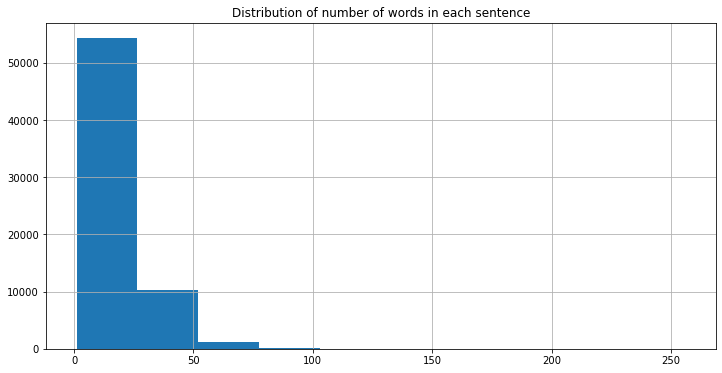

In [10]:
potter_df['NumWords'] = potter_df['Sentence'].apply(lambda x: len(x.split()))
potter_df[['NumWords']].hist(figsize=(12, 6), bins=10, xlabelsize=10, ylabelsize=10);
plt.title("Distribution of number of words in each sentence")

In [11]:
potter_df['Sentence']


0        r w n harry potter the worst birthday not for ...
1        vernon dursley had been woken in the early hou...
2          third time this week he roared across the table
3        if you can control that owl it ll have to go h...
4                                        she bored he said
                               ...                        
65982    but mate you re going to have to come round my...
65983            yeah we shouldn miss that he said finally
65984    his hand closed automatically around the fake ...
65985    page 730 harry potter and the half blood prince k
65986                                              rowling
Name: Sentence, Length: 65987, dtype: object

In [12]:
all_words = ''.join([word for word in potter_df['Sentence']]).replace('\n', ' ')
all_words[0:1000]

'r w n harry potter the worst birthday not for the first time an argument had broken out over breakfast at number four privet drivevernon dursley had been woken in the early hours of the morning by loud hooting noise from his nephew harry roomthird time this week he roared across the tableif you can control that owl it ll have to go harry tried yet again to explainshe bored he saidshe used to flying around outsideif could just let her out at night do look stupid snarled uncle vernon bit of fried egg dangling from his bushy mustacheknow what 11 happen if that owl let out he exchanged dark looks with his wife petuniaharry tried to argue back but his words were drowned by long loud belch from the dursleys son dudleypage 2 harry potter and the chamber of secrets krowling want more bacon there more in the frying pan sweetums said aunt petunia turning misty eyes on her massive sonwe must build you up while we ve got the chancei don like the sound of that school foodnonsense petunia never wen

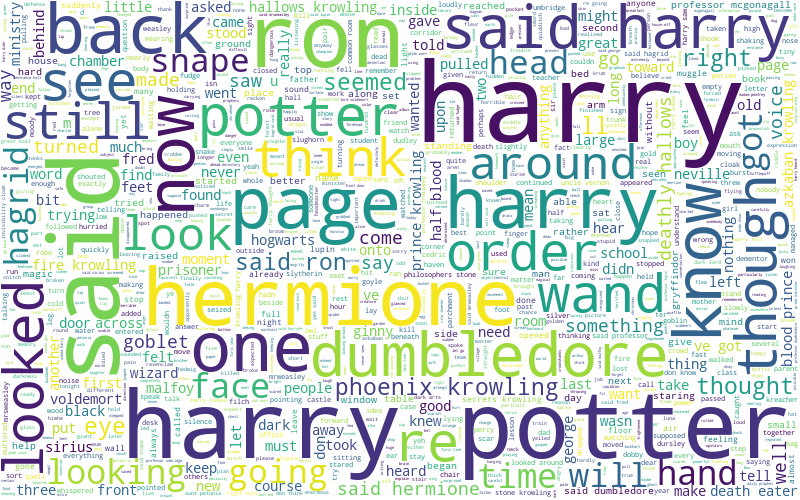

In [13]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white", max_words=10000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(all_words)

# Visualize the word cloud
wordcloud.to_image()

In [14]:
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = ''
    lower = texts.lower()
    no_punctuation = NON_ALPHANUM.sub(r' ', lower)
    no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
    return no_non_ascii
  
potter_df['Sentence2'] = potter_df['Sentence'].apply(normalize_texts)
potter_df.head()
potter_df['Sentence2'] = potter_df['Sentence2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

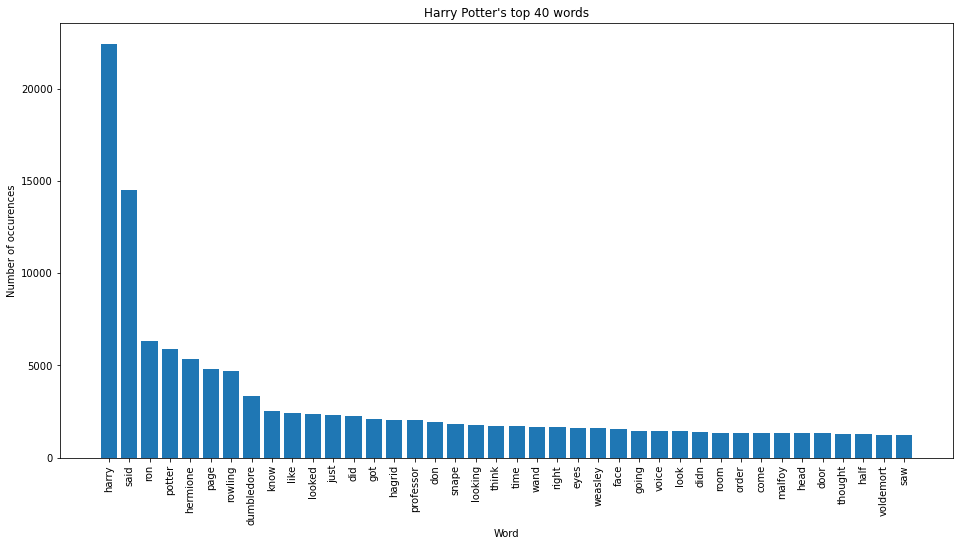

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_n_words(corpus, n=10):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

words = []
word_values = []
for i,j in get_top_n_words(potter_df['Sentence2'], 40):
    words.append(i)
    word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title("Harry Potter's top 40 words");
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

## NETWORK MODEL 

# Page Rank

In [60]:
from sentence_transformers import SentenceTransformer

In [61]:
bmodel = SentenceTransformer('all-MiniLM-L6-v2') #384 dims

In [62]:
bert_embeddings = bmodel.encode(processed_sentences[1:2000])
bert_embeddings.shape

(1999, 384)

In [63]:
for i, (sentence, embedding) in enumerate(zip(processed_sentences[1:2000], bert_embeddings)):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    if i == 3: break

Sentence: vernon dursley had been woken in the early hours of the morning by loud hooting noise from his nephew harry room
Embedding: [-2.34271493e-02  5.30426502e-02  2.86443066e-02  1.44668911e-02
 -1.18030356e-02 -6.58766851e-02 -1.84403956e-02 -5.77775715e-03
  1.00518446e-02 -1.04153238e-01 -7.60652870e-02  4.25984006e-04
  4.72015589e-02  4.28071804e-02  1.59385102e-03 -1.42078977e-02
  8.24310910e-03  6.50132149e-02 -6.44032334e-05  1.46399690e-02
 -1.59889646e-02  1.13209307e-01  3.83656137e-02  2.66488269e-02
  1.17797211e-01 -4.93063666e-02  1.45496324e-01 -1.09645901e-02
  4.95850062e-03  1.69733223e-02  6.87005669e-02 -1.17492616e-01
 -1.14872744e-02 -4.20617051e-02 -2.37740017e-02 -2.20294483e-03
  3.54071073e-02  2.96331737e-02  1.63088754e-01  1.28761549e-02
  4.14674878e-02 -1.15741463e-02 -3.13221067e-02  5.75998761e-02
 -1.07319266e-01  6.41453490e-02 -3.02756615e-02 -5.32857329e-02
  3.43168043e-02  4.02128557e-03  9.91281122e-02  1.52015612e-02
  4.10473049e-02 -2.1

In [64]:
import numpy as np
a = bert_embeddings[0]
b = bert_embeddings[1]
cos_sim = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
cos_sim

0.2009812

In [65]:
bert_embeddings.shape

(1999, 384)

In [66]:
from tqdm import tqdm
#M = np.zeros((1933, 1933))
M = np.eye(1999)

for i,a in tqdm(enumerate(bert_embeddings)):
    for j,b in enumerate(bert_embeddings):
        if i != j:
            M[i,j] = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))

1999it [00:57, 34.95it/s]


In [67]:
import networkx

similarity_graph = networkx.from_numpy_array(M)
similarity_graph

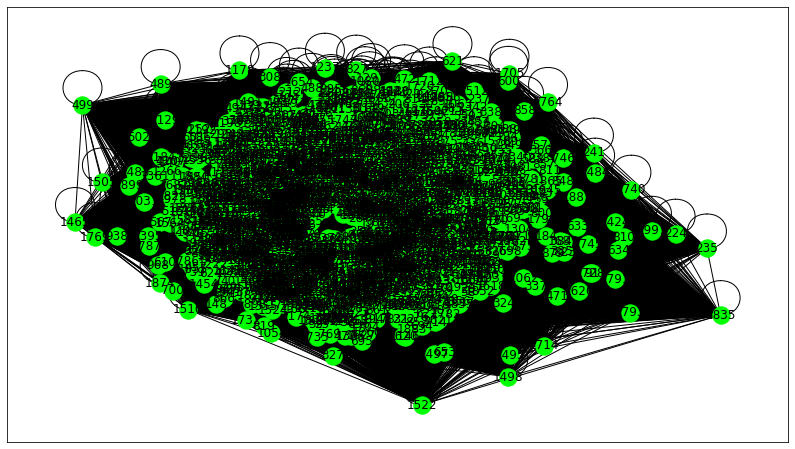

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14, 8))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [21]:
scores = networkx.pagerank(similarity_graph)
nx_ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
nx_ranked_sentences[:10]

[(0.0007375712068709683, 453),
 (0.0007288187699921694, 1082),
 (0.0007258387110455458, 1402),
 (0.000723680258191265, 375),
 (0.0007228155502607811, 374),
 (0.0007199016288348526, 268),
 (0.0007189107603599915, 170),
 (0.0007187224623906522, 1663),
 (0.0007182942431983169, 1326),
 (0.0007181443161016924, 382)]

In [25]:
processed_sentences[375]

'rowling 3 the burrow ron breathed harry creeping to the window and pushing it up so they could talk through the bars'

In [33]:
for i in range(10):
    print(processed_sentences[nx_ranked_sentences[i][1]])
    print('----------')

don know whether the malfoys own house elf
----------
they were up at dawn but somehow they still seemed to have great deal to do
----------
amazing said neville awestruck
----------
rowling 3 the burrow ron breathed harry creeping to the window and pushing it up so they could talk through the bars
----------
page 27 harry potter and the chamber of secrets k
----------
two seconds later harry heart thudding madly heard uncle vernon page 20 harry potter and the chamber of secrets k
----------
such an honor it is
----------
the bell rang and there was mad rush toward the exit
----------
dumbledore was looking unusually grave
----------
you know we re not supposed to do spells outside school page 28 harry potter and the chamber of secrets k
----------


## Clustering


K-Medoids is a clustering algorithm resembling the K-Means clustering technique. It falls under the category of unsupervised machine learning. It majorly differs from the K-Means algorithm in terms of the way it selects the clusters’ centres. The former selects the average of a cluster’s points as its centre (which may or may not be one of the data points) while the latter always picks the actual data points from the clusters as their centres (also known as ‘exemplars’ or ‘medoids’). K-Medoids also differs in this respect from the K-Medians algorithm whic,h is the same as K-means, except that it chooses the medians (instead of means) of the clusters as centres.

Mean of the data points is a measure that gets highly affected by the extreme points. So in K-Means algorithm, the centroid may get shifted to a wrong position and hence result in incorrect clustering if the data has outliers because then other points will move away from  . On the contrary, a medoid in the K-Medoids algorithm is the most central element of the cluster, such that its distance from other points is minimum. Since medoids do not get influenced by extremities, the K-Medoids algorithm is more robust to outliers and noise than K-Means algorithm.

Randomly pick `k` points from the input data to create `k` clusters. The correctness of the choice of k’s value can be assessed using methods such as the Silhouette method. Each data point gets assigned recusively to the cluster to which its nearest medoid belongs. The algorithm is as follows:

For each data point of cluster i, its distance from all other data points is computed and added. The point of ith cluster for which the computed sum of distances from other points is minimal is assigned as the medoid for that cluster. Repeat until convergence is reached i.e. the medoids stop moving.

The complexity of the K-Medoids algorithm comes to $O(N^2CT)$ where N, C and T denote the number of data points, number of clusters and number of iterations respectively. With similar notations, the complexity K-Means algorithm can be given as $O(NCT)$.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

In [36]:
from sklearn.datasets import load_digits
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [37]:
digits.data.shape

(1797, 64)

In [38]:
num_digits = len(np.unique(digits.target))
num_digits

10

In [39]:
np.std(bert_embeddings[0])

0.051021777

In [40]:
bert_embeddings_std = scale(bert_embeddings)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [42]:
bert_embeddings_red = PCA(n_components=2).fit_transform(bert_embeddings_std)

In [43]:
h = 0.02 #step size of the mesh 
#Minimum and maximum x-coordinates
xmin, xmax = bert_embeddings_red[:, 0].min() - 1, bert_embeddings_red[:, 0].max() + 1
#Minimum and maximum y-coordinates
ymin, ymax = bert_embeddings_red[:, 1].min() - 1, bert_embeddings_red[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))

In [44]:
models = [
     (
         KMedoids(metric="manhattan", n_clusters=num_digits, 
         init="heuristic", max_iter=2),"Manhattan metric",
     ),
     (
         KMedoids(metric="euclidean", n_clusters=num_digits,  
         init="heuristic", max_iter=2),"Euclidean metric",
     ),
     (KMedoids(metric="cosine", n_clusters=num_digits, init="heuristic", 
      max_iter=2), "Cosine metric", ),
 ]
models

[(KMedoids(max_iter=2, metric='manhattan', n_clusters=10), 'Manhattan metric'),
 (KMedoids(max_iter=2, n_clusters=10), 'Euclidean metric'),
 (KMedoids(max_iter=2, metric='cosine', n_clusters=10), 'Cosine metric')]

In [45]:
#number of rows = integer(ceiling(number of model variants/2))
num_rows = int(np.ceil(len(models) / 2.0))
#number of columns
num_cols = 2 

In [46]:
#Clear the current figure first (if any)
plt.clf()

#Initialize dimensions of the plot
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

/opt/anaconda3/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:243: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:243: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:243: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


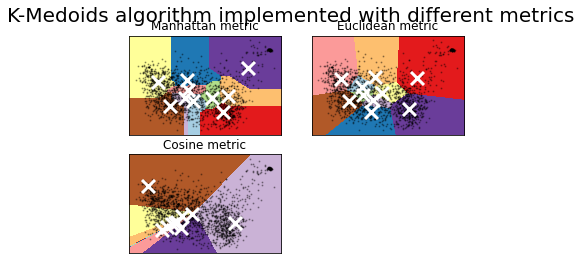

In [47]:
for i, (model, description) in enumerate(models):
    # Fit each point in the mesh to the model
    model.fit(bert_embeddings_red)
    
    #Predict the labels for points in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result  into a color plot
    Z = Z.reshape(xx.shape)
   
    #Subplot for the ith model variant
    plt.subplot(num_cols, num_rows, i + 1)
   
    #Display the subplot
    plt.imshow(
         Z,    #data to be plotted
         interpolation="nearest",
        #bounding box coordinates (left,right,bottom,top)
         extent=(xx.min(), xx.max(), yy.min(), yy.max()),
         cmap=plt.cm.Paired,  #colormap
         aspect="auto", #aspect ratio of the axes
         origin="lower",  #set origin as lower left corner of the axes
    )
    plt.plot(
         bert_embeddings_red[:, 0], bert_embeddings_red[:, 1], "k.", markersize=2, alpha=0.3
    )
        
    # Plot the centroids as white cross marks
    centroids = model.cluster_centers_
    plt.scatter(
         centroids[:, 0],
         centroids[:, 1],
         marker="x",
         s=169,  #marker’s size (points^2)
         linewidths=3, #width of boundary lines
         color="w",  #white color for centroids markings
         zorder=10,  #drawing order of axes
    )
    
    #describing text of the tuple will be title of the subplot
    plt.title(description)  
    plt.xlim(xmin, xmax)  #limits of x-coordinates
    plt.ylim(ymin, ymax)  #limits of y-coordinates
    plt.xticks(())   
    plt.yticks(())
    
#Upper title of the whole plot
plt.suptitle(
    #Text to be displayed
    "K-Medoids algorithm implemented with different metrics\n\n",
    fontsize=20,  #size of the fonts
)
plt.show()

In [48]:
centroids

array([[-0.27717182, -0.22426271],
       [-4.674482  , -3.8238034 ],
       [-2.7467701 , -2.27186   ],
       [-3.914655  , -3.2559369 ],
       [-2.5449765 , -2.039821  ],
       [-3.3008013 , -2.6409883 ],
       [ 5.9055557 , -2.3774755 ],
       [-1.9010419 , -3.390168  ],
       [-1.7456785 , -0.69110864],
       [-6.6610985 ,  6.016229  ]], dtype=float32)

In [49]:
centroids = []
for i, (model, description) in enumerate(models):
    model.fit(bert_embeddings_std)
    centroids.append(model.cluster_centers_)

/opt/anaconda3/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:243: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn_extra/cluster/_k_medoids.py:243: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [50]:
centroid_indeces = []

for i in range(10):
    c = centroids[2][i]
    for j in range(bert_embeddings_std.shape[0]):
        if np.allclose(c, bert_embeddings_std[j]):
            centroid_indeces.append(j)
            break

In [51]:
centroid_indeces

[556, 374, 1798, 1366, 404, 42, 121, 1970, 1802, 567]

In [52]:
for i in centroid_indeces:
    print(i, ' -------')
    print(processed_sentences[i])
    print('---------')

556  -------
rowling you will not snapped mrs
---------
374  -------
page 27 harry potter and the chamber of secrets k
---------
1798  -------
field invasion ron and hermione were crossing the grass to see what was going on
---------
1366  -------
so did said harry taking one too
---------
404  -------
watch out for the bottom stair it creaks harry whispered back as the twins disappeared onto the dark landing
---------
42  -------
page 5 harry potter and the chamber of secrets k
---------
121  -------
know what day it is sang dudley waddling toward him
---------
1970  -------
it was so late that the gryffindor common room was almost empty
---------
1802  -------
everyone just been admiring the brooms my father bought our team ron gaped openmouthed at the seven superb broomsticks in front of him
---------
567  -------
weasley book
---------
